# Loan Application Status Prediction

Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 
Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [26]:
df=pd.read_csv(r'C:\Users\Cape-Mumbai\Downloads\loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Exploratory Data Analysis (EDA)

In [5]:
df.shape

(614, 13)

There are total 614 rows and 13 column in the dataset

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [8]:
# Checking the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.isnull().sum().sum()

149

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: >

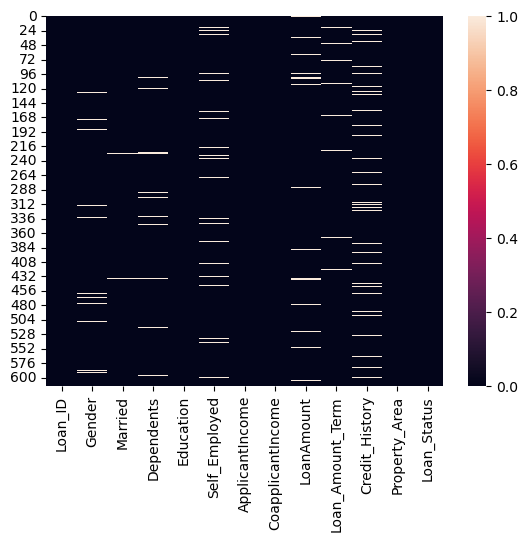

In [11]:
# Visualize using Heatmap
sns.heatmap(df.isnull())

In [12]:
#Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253

In [14]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="float":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)

Numerical Columns: ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns:",categorical_col)

In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Visualization

Univariate Analysis

Male      489
Female    112
Name: Gender, dtype: int64


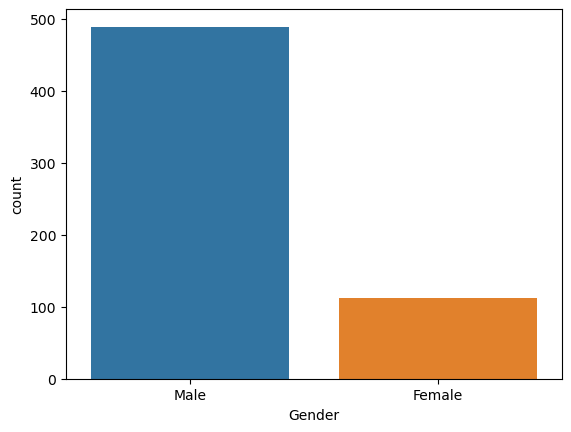

In [17]:
ax=sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

Yes    398
No     213
Name: Married, dtype: int64


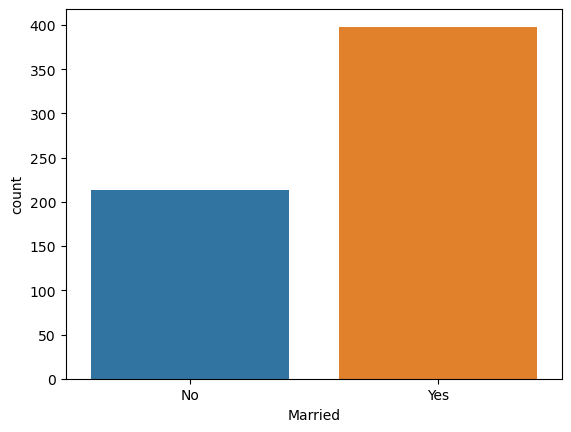

In [18]:
ax=sns.countplot(x='Married',data=df)
print(df['Married'].value_counts())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


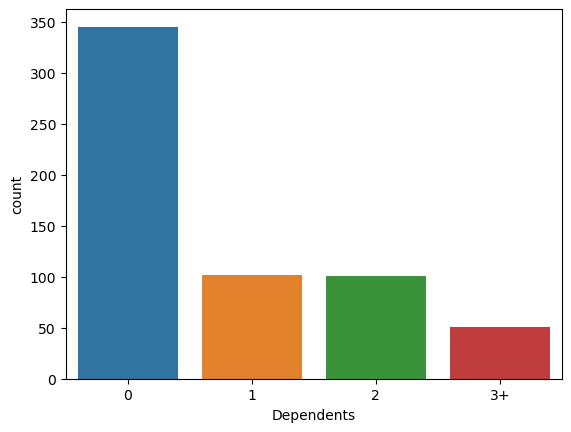

In [19]:
print(df['Dependents'].value_counts())
ax=sns.countplot(x='Dependents',data=df)
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


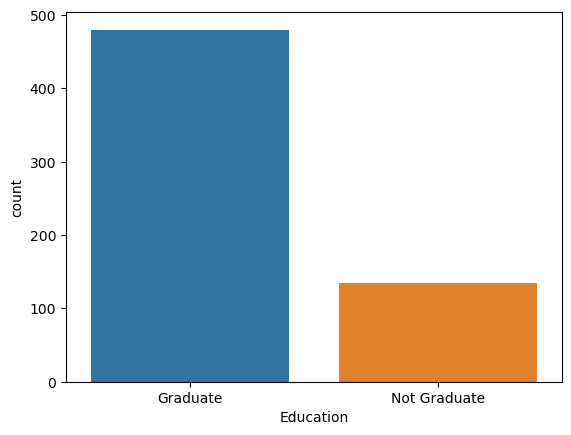

In [20]:
print(df['Education'].value_counts())
ax=sns.countplot(x='Education',data=df)
plt.show()

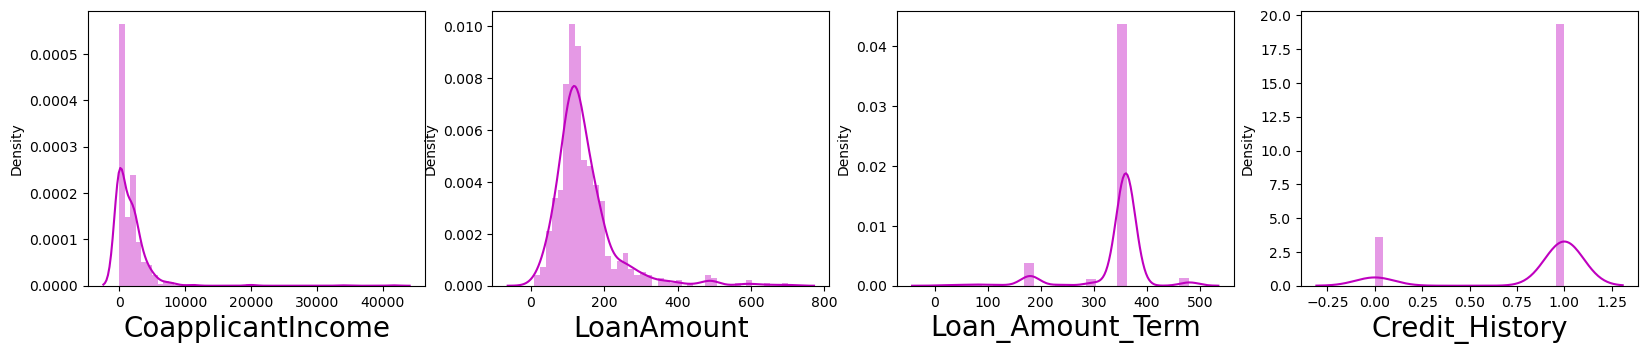

In [22]:
#Let's check the data has been distributed in each column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='m')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

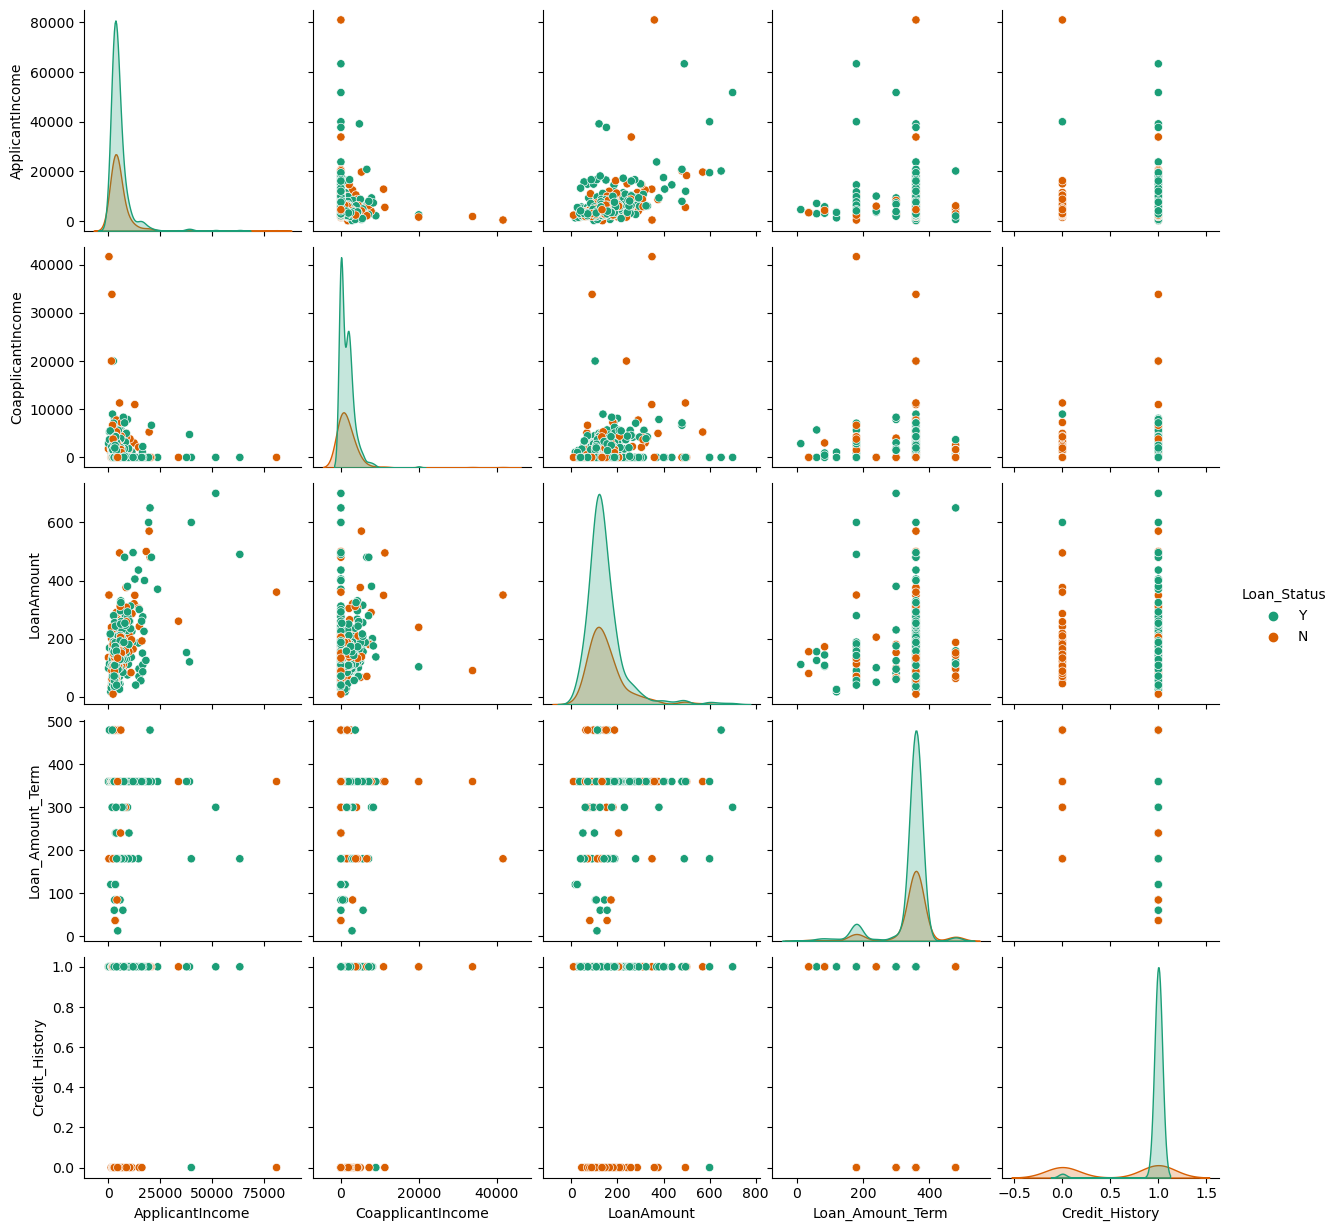

In [4]:
sns.pairplot(df,hue="Loan_Status",palette="Dark2")
plt.show()

# Checking for Outliers

In [5]:
df.shape

(614, 13)

In [27]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [28]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [29]:
df.skew()

Gender              -0.953015
Married             -0.538097
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [30]:
df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.336094,0.024382,-0.025022,0.094472,0.073308,0.137736,-0.068536,-0.000515,-0.030903,0.008690
Married,0.336094,1.000000,0.006759,-0.038153,0.052119,0.069877,0.148922,-0.097345,0.010690,0.007973,0.096657
Education,0.024382,0.006759,1.000000,-0.021130,-0.140760,-0.062290,-0.171133,-0.078784,-0.081822,-0.065243,-0.085884
Self_Employed,-0.025022,-0.038153,-0.021130,1.000000,0.095664,0.052218,0.091348,-0.037492,0.056894,-0.013439,0.010880
ApplicantIncome,0.094472,0.052119,-0.140760,0.095664,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.009500,-0.004710
CoapplicantIncome,0.073308,0.069877,-0.062290,0.052218,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.010522,-0.059187
LoanAmount,0.137736,0.148922,-0.171133,0.091348,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.045792,-0.037318
Loan_Amount_Term,-0.068536,-0.097345,-0.078784,-0.037492,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.078748,-0.021268
Credit_History,-0.000515,0.010690,-0.081822,0.056894,-0.014715,-0.002056,-0.008433,0.001470,1.000000,-0.001969,0.561678
Property_Area,-0.030903,0.007973,-0.065243,-0.013439,-0.009500,0.010522,-0.045792,-0.078748,-0.001969,1.000000,0.032112


We have find outliers in every dataset

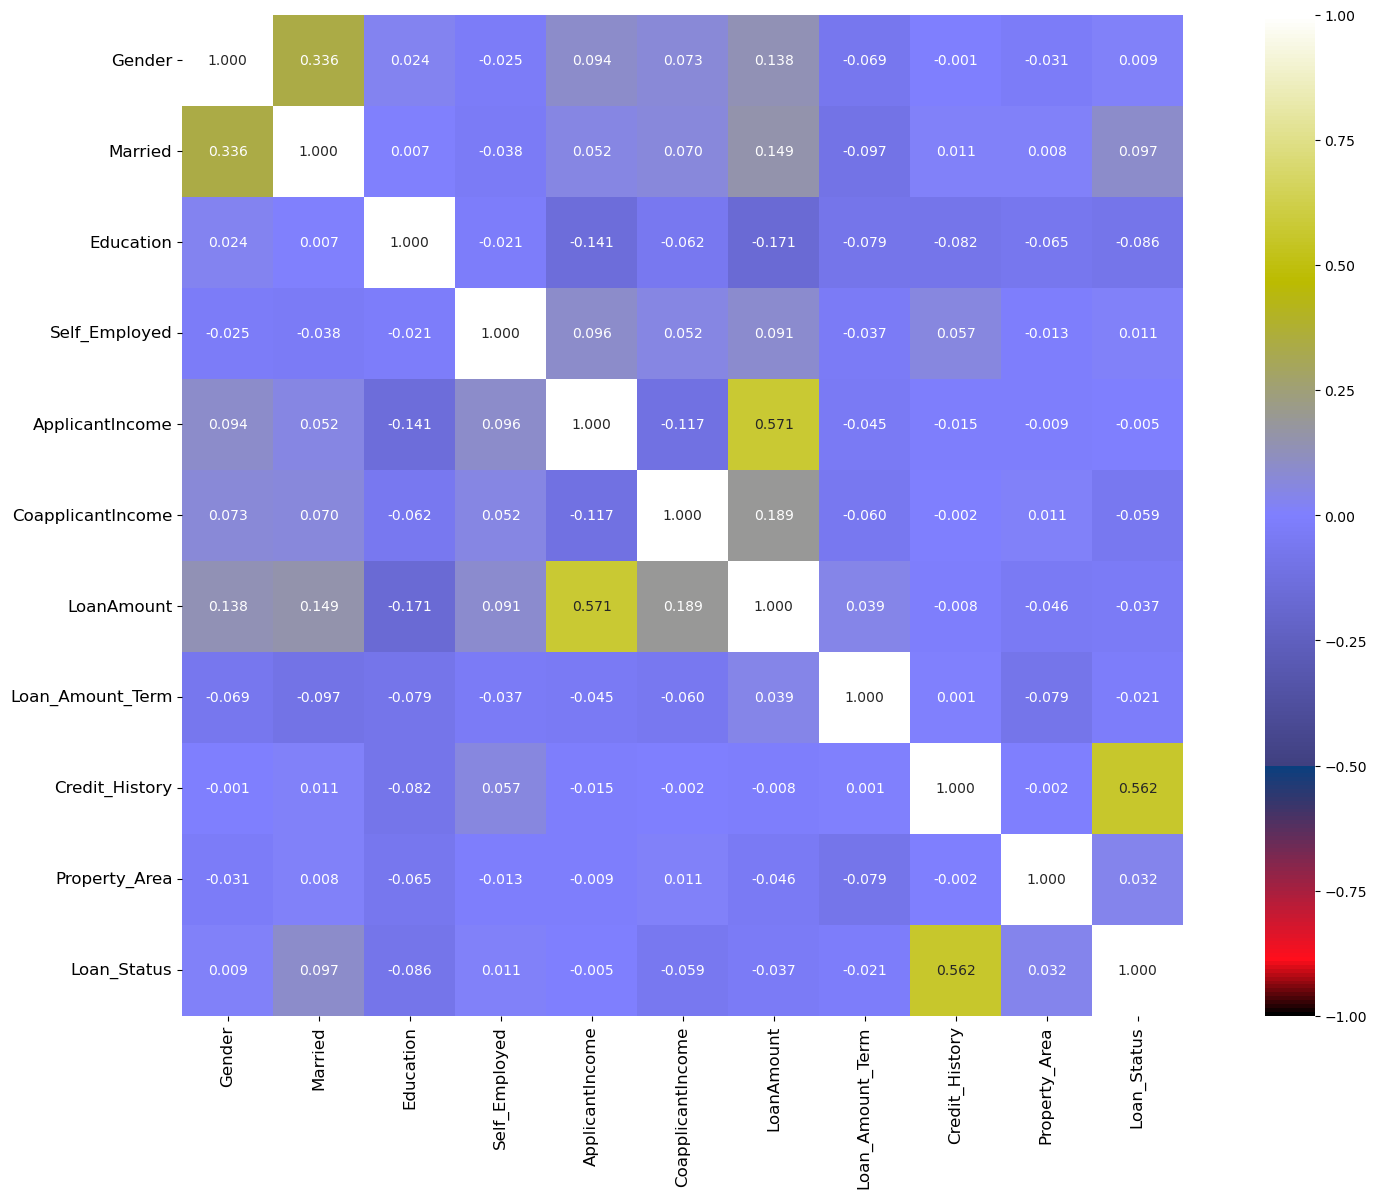

In [31]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [38]:
df.drop(["Loan_ID"], axis=1, inplace=True)

In [43]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [44]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [50]:
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble.HistGradientBoostingClassifier and Regressor
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

SyntaxError: invalid syntax (3520500873.py, line 12)

In [46]:
X = df.drop('Loan_Status', axis=1)
Y = df['Loan_Status']

In [47]:
Y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [49]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,2


SCALING

In [52]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.382616,-1.357847,-0.752131,-0.528362,-0.445039,0.072991,-0.554487,NaN,0.276642,0.432861,1.223298
1,0.382616,0.705812,0.233704,-0.528362,-0.445039,-0.134412,-0.038732,-0.215309,0.276642,0.432861,-1.318513
2,0.382616,0.705812,-0.752131,-0.528362,1.426564,-0.393747,-0.554487,-0.940328,0.276642,0.432861,1.223298
3,0.382616,0.705812,-0.752131,1.892641,-0.445039,-0.462062,0.251980,-0.308860,0.276642,0.432861,1.223298
4,0.382616,-1.357847,-0.752131,-0.528362,-0.445039,0.097728,-0.554487,-0.063289,0.276642,0.432861,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-1.990376,-1.357847,-0.752131,-0.528362,-0.445039,-0.410130,-0.554487,-0.881859,0.276642,0.432861,-1.318513
610,0.382616,0.705812,2.205374,-0.528362,-0.445039,-0.212557,-0.554487,-1.244368,-2.489775,0.432861,-1.318513
611,0.382616,0.705812,0.233704,-0.528362,-0.445039,0.437174,-0.472404,1.246423,0.276642,0.432861,1.223298
612,0.382616,0.705812,1.219539,-0.528362,-0.445039,0.357064,-0.554487,0.474628,0.276642,0.432861,1.223298


In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (429, 11)
Training target vector size: (429,)
Test feature matrix size: (185, 11)
Test target vector size: (185,)


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values